# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
print(tf.__version__)

2.5.0


## Part 1 - Data Preprocessing

### Preprocessing the Training and Validation sets

In [3]:
# Config variables
image_size = 150
batch = 32
epochs = 50

In [4]:
# rescale apply a Feature Scaling Normalization diviting each pixel per 255 to return a value between 0 and 1
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    brightness_range=[0.2,1.0],
    horizontal_flip = True,
    vertical_flip= True
)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(image_size, image_size),
    batch_size=batch,
    class_mode='binary'
)

Found 7630 images belonging to 2 classes.


In [6]:
validation_set = val_datagen.flow_from_directory(
    'dataset/val',
    target_size=(image_size, image_size),
    batch_size=batch,
    class_mode='binary'
)

Found 3271 images belonging to 2 classes.


### Preprocessing the Test set

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
test_set = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(image_size, image_size),
    batch_size=batch,
    class_mode='binary'
)

Found 2698 images belonging to 2 classes.


## Part 2 - Building the CNN

In [9]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu', input_shape=[image_size, image_size,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [10]:
# adam = tf.keras.optimizers.Adam(learning_rate=0.001)

In [11]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [12]:
history = cnn.fit(x = training_set, validation_data = validation_set, epochs = epochs)

Epoch 1/50
239/239 [==============================] - 349s 1s/step - loss: 0.5317 - accuracy: 0.7419 - val_loss: 0.2909 - val_accuracy: 0.8710
Epoch 2/50
239/239 [==============================] - 165s 690ms/step - loss: 0.3182 - accuracy: 0.8599 - val_loss: 0.2634 - val_accuracy: 0.8759
Epoch 3/50
239/239 [==============================] - 163s 682ms/step - loss: 0.2751 - accuracy: 0.8797 - val_loss: 0.1894 - val_accuracy: 0.9153
Epoch 4/50
239/239 [==============================] - 150s 626ms/step - loss: 0.2379 - accuracy: 0.9014 - val_loss: 0.2067 - val_accuracy: 0.9098
Epoch 5/50
239/239 [==============================] - 144s 602ms/step - loss: 0.1959 - accuracy: 0.9228 - val_loss: 0.1858 - val_accuracy: 0.9220
Epoch 6/50
239/239 [==============================] - 146s 610ms/step - loss: 0.1847 - accuracy: 0.9236 - val_loss: 0.1832 - val_accuracy: 0.9132
Epoch 7/50
239/239 [==============================] - 146s 611ms/step - loss: 0.1661 - accuracy: 0.9338 - val_loss: 0.1142 - va

## Part 4 - Evaluating the CNN

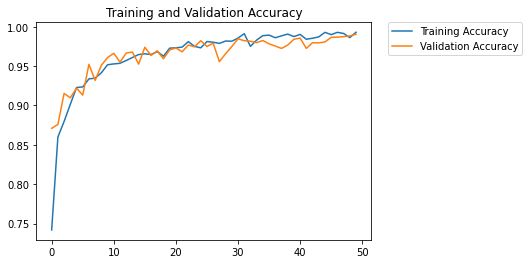

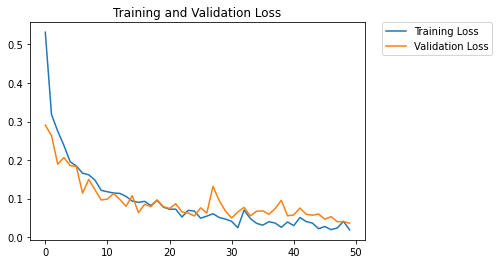

In [13]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot  ( epochs, accuracy, label='Training Accuracy' )
plt.plot  ( epochs, val_accuracy, label='Validation Accuracy' )
plt.title ('Training and Validation Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.figure()

plt.plot  ( epochs, loss, label='Training Loss' )
plt.plot  ( epochs, val_loss, label='Validation Loss' )
plt.title ('Training and Validation Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

In [14]:
result = cnn.evaluate(test_set)
print(f'Accuracy of this model : {result[1]:.6f}')
print(f'Loss of this model : {result[0]:.6f}')

85/85 [==============================] - 50s 590ms/step - loss: 0.0405 - accuracy: 0.9863
Accuracy of this model : 0.986286
Loss of this model : 0.040546


## Part 5 - Making Predictions

In [15]:
# Check classes indices
print(training_set.class_indices)
print(validation_set.class_indices)
print(test_set.class_indices)

{'fresh': 0, 'rotten': 1}
{'fresh': 0, 'rotten': 1}
{'fresh': 0, 'rotten': 1}


In [38]:
import numpy as np
from keras.preprocessing import image

imagefile = 'pera2.jpg'

test_image = image.load_img('dataset/predictions_test/' + imagefile, target_size=(image_size, image_size))
test_image = image.img_to_array(test_image)
# Add a aditional dimention for batch_size
# Commonly, batch is the first dimention (axis = 0)
test_image = np.expand_dims(test_image, axis = 0)
# Normalize the image
result = cnn.predict(test_image/255.0)
print(result)
prob = np.where(result[0][0] > 0.5, 1, 0)

if prob == 1:
    print('rotten')
else:
    print('fresh')

[[3.0625508e-06]]
fresh


## Part 6 - Saving Model

In [17]:
# Save model on Tensorflow's SavedModel and Keras H5 format
cnn.save('tf_model_v1.1')
cnn.save('model_v1.1.h5')

INFO:tensorflow:Assets written to: tf_model_v1.1\assets
